# Autor: Felipe Langoni Ramos

## Análise Exploratória dos dados do INMEP

In [ ]:
#import pandas as pd 
#import seaborn as sn
#import matplotlib.pyplot as plt
#import numpy as np
#import math as mp


Importando o Dataset

In [ ]:
#data = "/content/drive/MyDrive/temperatura_maxima_diaria/dados_83377_D_1980-01-01_2021-12-31.csv"

## Transformação de Dados

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv(data, skiprows=11, sep=";", names = ["Data", "Temperatura_Maxima"])
#df.head()

In [ ]:
#df["Data"]

In [ ]:
#df[["Data", "Temperatura_Máxima_Diária"]] = df["Data"].str.split("", 1, expand=True)
#df

In [ ]:
#df2 = df[["Data", "Temperatura_Máxima_Diária"]].copy()
#df2

In [ ]:
#dfdata = df2["Data"]
#display(dfdata)

In [ ]:
#dftemp = df2["Temperatura_Máxima_Diária"]
#display(dftemp)

In [ ]:
#dfdata.to_csv('dfdata.csv', header=False)

In [ ]:
#print(df.count())
#print(df["Data"].dtypes)
#print(df["Temperatura_Máxima_Diária"].dtypes)

#### Medidas Estatísticas

In [ ]:
#df.describe()

In [ ]:
#df["Temperatura_Máxima_Diária"].describe()

In [ ]:
#df2 = df["Temperatura_Máxima_Diária"]
#df2 = df2.values
#df2 = pd.DataFrame(df2)
#df2

In [ ]:
#dfreplace = df2.apply(lambda x: x.str.replace(',','.'))
#dfreplace

In [ ]:
#dfreplace = dfreplace.astype(float)
#dfreplace

In [ ]:
#df4 = pd.read_csv(data, skiprows=11)
#df4

In [ ]:
#dfdatar = pd.read_csv("dfdata.csv", header=0)
#dfdatar

In [ ]:
#dffinal = pd.concat([dfdatar, dfreplace],axis=1)
#dffinal

In [ ]:
#dffinal.to_csv("dffinal.csv", header=True)

In [ ]:
#df = pd.read_csv("dffinal.csv", header=None)
#df

In [ ]:
#df = dffinal.columns.to_frame().T.append(dffinal, ignore_index=True)
#df

In [ ]:
#df.to_csv("dffinall.csv")

In [ ]:
#df = pd.read_csv("dffinall.csv", names = ["Nan","Data", "Unamed","Temperatura"])
#df

In [ ]:
#df = df.iloc[1: , :]
#df

In [ ]:
#df.Temperatura = df.Temperatura.shift(-1)
#df

In [ ]:
#new_df = df[["Data", "Temperatura"]].copy()
#new_df

In [ ]:
# Descartando missing values
#new_df = new_df.dropna()
#new_df

In [ ]:
#new_df.describe()

In [ ]:
#data = new_df["Data"]
#data

In [ ]:

#new_df["Data"] = pd.to_datetime(new_df["Data"], format='%Y/%m/%d %H:%M:%S.%f')
#new_df

In [ ]:
#new_df.to_parquet("/content/drive/MyDrive/temperatura_maxima_diaria/oi.parquet")

# Inicio

In [ ]:
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import math as mp
new_df = pd.read_parquet("/content/drive/MyDrive/temperatura_maxima_diaria/oi.parquet")
new_df

,Data,Temperatura
1,1980-01-01,22.4
2,1980-01-02,24.0
3,1980-01-03,24.8
4,1980-01-04,28.5
5,1980-01-05,27.5
...,...,...
15337,2021-12-27,27.9
15338,2021-12-28,24.9
15339,2021-12-29,25.5
15340,2021-12-30,23.2


In [ ]:
Temperatura = new_df["Temperatura"]
Temperatura

1        22.4
2        24.0
3        24.8
4        28.5
5        27.5
         ... 
15337    27.9
15338    24.9
15339    25.5
15340    23.2
15341    22.5
Name: Temperatura, Length: 15290, dtype: float64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15290 entries, 1 to 15341
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         15290 non-null  datetime64[ns]
 1   Temperatura  15290 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 358.4 KB


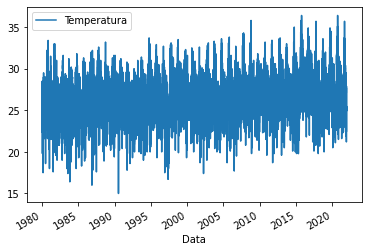

In [ ]:
new_df.plot.line(x="Data", y="Temperatura")

In [ ]:
new_df.to_csv("/content/drive/MyDrive/temperatura_maxima_diaria/temperatura_máxima.csv")

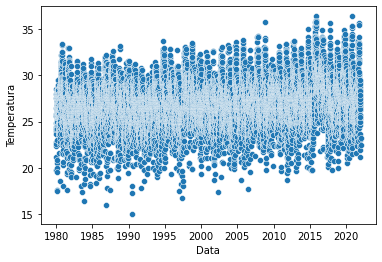

In [ ]:
sn.scatterplot(data=new_df, x="Data", y="Temperatura")

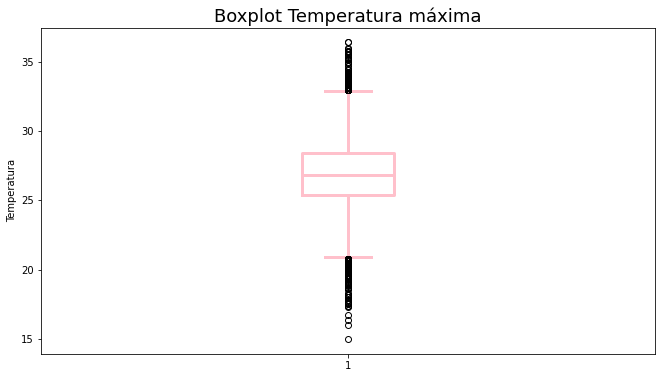

In [ ]:
plt.figure(figsize =(11, 6))
bplots = plt.boxplot(Temperatura,  vert = 1, patch_artist = False)
colors = ['pink', 'lightblue', 'lightgreen']
c = 0
for i, bplot in enumerate(bplots['boxes']):
  bplot.set(color=colors[c], linewidth=3)
  c += 1

  # Linhas de contorno
  colorss = ['pink','pink', 'lightblue', 'lightblue', 'lightgreen', 'lightgreen']
  c2 = 0
  for whisker in bplots['whiskers']:
    whisker.set(color=colorss[c2], linewidth=3)
    c2+= 1

  c3 = 0
  for cap in bplots['caps']:
    cap.set(color=colorss[c3], linewidth=3)
    c3 +=1

  c4 = 0
  for median in bplots['medians']:
    median.set(color=colors[c4], linewidth=3)
    c4 +=1

  # Adicionando Título ao gráfico
  plt.title("Boxplot Temperatura máxima", loc="center", fontsize=18)
  plt.xlabel("")
  plt.ylabel("Temperatura")

  plt.show()

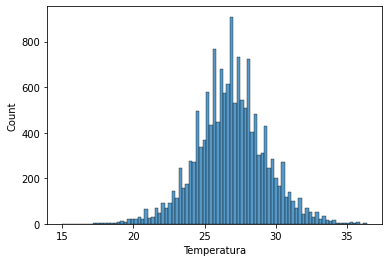

In [ ]:
sn.histplot(data=new_df, x="Temperatura")

In [ ]:
# Medida de curtose
curtose = new_df['Temperatura'].kurtosis()
print('Curtose ', curtose)

Curtose  0.6726570959006226


In [ ]:
# Medida de assimetria
assimetria = new_df['Temperatura'].skew()
print('Assimetria(Skewness) ', assimetria)

Assimetria(Skewness)  -0.03714121126803299


In [ ]:
new_df['Temperatura'].astype(float)

1        22.4
2        24.0
3        24.8
4        28.5
5        27.5
         ... 
15337    27.9
15338    24.9
15339    25.5
15340    23.2
15341    22.5
Name: Temperatura, Length: 15290, dtype: float64

# Agrupamentos

#### K raiz de N: Para agrupar os dados utilizando o métodos de agrypamento, é necessário encontrar o número de classes e a amblitude de cada classe. Para o caso deste método, foi calculada a raiz quadrada do número total de observações utilizando o método "sqrt", retornando o número de classes, e dividindo a amplitude(maior valor menos o menor) pelo valor encontrado, é possível encontrar a amplitude que cada classe terá

In [ ]:
mini = new_df['Temperatura'].min()
maxi = new_df['Temperatura'].max()
amp = maxi - mini
total = new_df['Temperatura'].count()
print(total)
print(amp)
print(mini)
print(maxi)

15290
21.4
15.0
36.4


In [ ]:
K = mp.sqrt(total)
print(K)

123.65273955719704


In [ ]:
h = amp/124
print(h)

0.17258064516129032


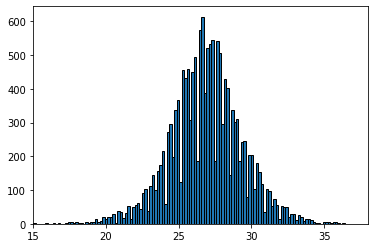

In [ ]:
plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+123,0.17), edgecolor='black')
plt.xlim([15, 38])
plt.show()

##Sturges: Para o agrupamento Sturges, foi utilizada a formula abaixo, que calcula o logarítimo do valor total de observações, e então soma com os valores 1 e 3.322 para encontrar o número de classes. Novamente, a amplitude é calculada dividindo a amplitude total pelo número de classes 

In [ ]:
k1 = 1 + 3.322 + mp.log(total,10)
print(k1)


8.50640748541232


In [ ]:
h1 = amp/k1
print(h1)

2.515750631121183


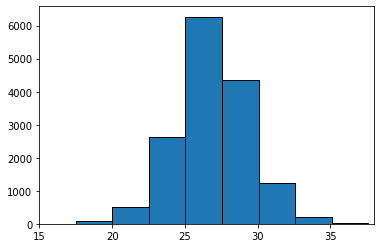

In [ ]:
plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+9,2.51), edgecolor='black')
plt.xlim([15, 38])
plt.show()

##Scott: Para a de Scott, as classes são calculadas a partir do desvio padrão das observações, multiplicada por 3.49 e por n, que representa o número total de observações elevado a -1/3. 

In [ ]:
std = new_df['Temperatura'].std()
print(std)

2.45346653115034


In [ ]:
n = total ** (-1/3)
print(n)

0.04029002203075981


In [ ]:
scott = 3.49 * std * n
print(scott)

0.3449872698653089


In [ ]:
h2 = amp/scott
print(h2)

62.03127439558874


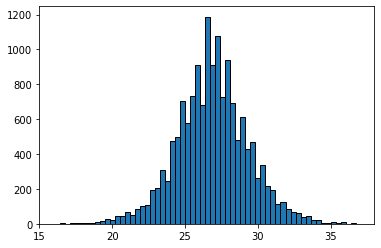

In [ ]:
plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+h2,scott), edgecolor='black')
plt.xlim([15, 38])
plt.show()

##Rice´s Rule: Para esse agrupamento, as classes são calculadas a partir da raiz quadrada do número total de observações vezes 2.

In [ ]:
rice = mp.sqrt(total) * 2
rice

247.30547911439407

In [ ]:
h3 = amp/rice
h3

0.08653265619764605

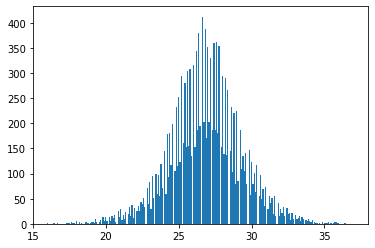

In [ ]:
plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+rice,h3))
plt.xlim([15, 38])
plt.show()

## Friedman & Diaconis

Por fim, porém não menos importante, a distribuição Friedman Diaconnis é calculada a partir da função abaixo.

In [ ]:
from scipy import stats
def freedman_diaconis(data, returnas="width"):
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)


In [ ]:
freedman_diaconis(data=new_df['Temperatura'], returnas="width")

0.2417401321845589

In [ ]:
freedman_diaconis(data=new_df['Temperatura'], returnas="bins")

89

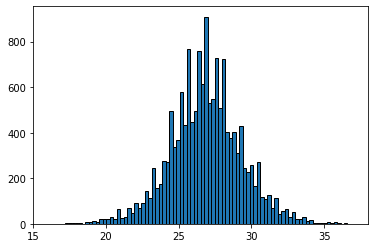

In [ ]:
plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+89,0.24),edgecolor='black')
plt.xlim([15, 38])
plt.show()

### Por meio de uma análise heurística a partir da vizualização das distribuições, foi decidido que Friedman Diaconis é a mais apropriada para este dataset

## Encontrando os Parâmetros necessários


In [ ]:
params1 = stats.norm.fit(new_df['Temperatura'], floc=0)
shape = params1[0]
scale = params1[1]
norma = [shape,scale]
params2 = stats.beta.fit(new_df['Temperatura'], floc=0, f0=1)
shape2 = params2[1]
scale2 = params2[3]
beta = [shape2,scale2]
params3 = stats.exponweib.fit(new_df['Temperatura'], floc=0, f0=1)
shape3 = params3[1]
scale3 = params3[3]
weib = [shape3,scale3]
params4 = stats.cauchy.fit(new_df['Temperatura'], floc=0)
shape4 = params4[0]
scale4 = params4[1]
cauchy = [shape4,scale4]
print('norm:',norma)
print('beta:',beta)
print('weibull:',weib)
print('cauchy:',cauchy)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


norm: [0, 26.977303701020773]
beta: [0.7240339884588991, 36.400000000000006]
weibull: [11.345812667993027, 27.981163525530377]
cauchy: [0, 26.754565429687563]


In [ ]:
a,b = params1 = stats.norm.fit(new_df['Temperatura'])
norma = [a,b]
params2 = stats.beta.fit(new_df['Temperatura'])
shape2 = params2[0]
scale2 = params2[1]
beta = [shape2,scale2]
params3 = stats.exponweib.fit(new_df['Temperatura'])
shape3 = params3[1]
scale3 = params3[3]
weib = [shape3,scale3]
params4 = stats.cauchy.fit(new_df['Temperatura'])
shape4 = params4[0]
scale4 = params4[1]
cauchy = [shape4,scale4]
print('norm:',norma)
print('beta:',beta)
print('weibull:',weib)
print('cauchy:',cauchy)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


norm: [26.865513407455854, 2.4533862987550488]
beta: [61127.574559804925, 3027.999838002188]
weibull: [5.865696882113532, 75.27024510213073]
cauchy: [26.846183425233885, 1.3818399453528354]


In [ ]:
a,b = params1 = stats.norm.fit(new_df['Temperatura'])
norma = [a,b]
params2 = stats.beta.fit(new_df['Temperatura'])
params3 = stats.exponweib.fit(new_df['Temperatura'])
params4 = stats.cauchy.fit(new_df['Temperatura'])
print('norm:',norma)
print('beta:',params2)
print('weibull:',params3)
print('cauchy:',params4)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


norm: [26.865513407455854, 2.4533862987550488]
beta: (61127.574559804925, 3027.999838002188, -2765.568788110334, 2930.759460714764)
weibull: (1831.3963115803797, 5.865696882113532, -80.39134396943822, 75.27024510213073)
cauchy: (26.846183425233885, 1.3818399453528354)


In [ ]:
from scipy.stats import weibull_min
params = stats.exponweib.fit(new_df['Temperatura'], floc=0, f0=1)
shape = params[1]
scale = params[3]
print('shape:',shape)
print('scale:',scale)

shape: 11.345812667993027
scale: 27.981163525530377





params1 = stats.norm.fit(new_df['Temperatura'], floc=0)params1 = stats.norm.fit(new_df['Temperatura'], floc=0)params1 = stats.norm.fit(new_df['Temperatura'], floc=0)params1 = stats.norm.fit(new_df['Temperatura'], floc=0)params1 = stats.norm.fit(new_df['Temperatura'], floc=0)vv#Normal

# Distribuições
### Normal: 
####Para plotar a curva da distribuição normal sobre a distribuição empírica, foi utilizado o método "stats" da biblioteca scipy. Calculando a função de densidade de probabilidade e estimando os parãmetros de média e desvio padrão, a curva é plotada

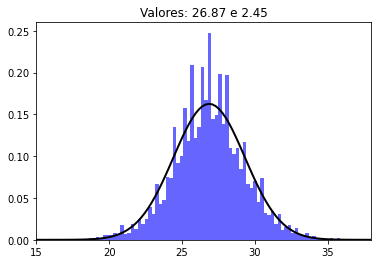

In [ ]:

from scipy.stats import norm
mu, std = norm.fit(new_df['Temperatura']) 
  

plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+89,0.24), density=True, alpha=0.6, color='b')
  

plt.xlim([15, 38])
x = np.linspace(15, 38, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Valores: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

In [ ]:
print(mu,std)

26.865513407455854 2.4533862987550488


### Weibull: 
#### Para esta distribuição, os parâmetros de center e scale são calculados a partir da função construida abaixo:

In [ ]:
# Parmatros
# f(x)=γα(x−μα)(γ−1)exp(−((x−μ)/α)γ)x≥μ;γ,α>0
def weibull(center,shape,scale):
    return (shape / scale) * (center / scale)**(shape-1) * np.exp(-(center/scale)**shape)

print(shape,scale)
bins = np.arange(mini, maxi+89,0.24)
center = (bins[:-1] + bins[1:]) / 2.

11.345812667993027 27.981163525530377


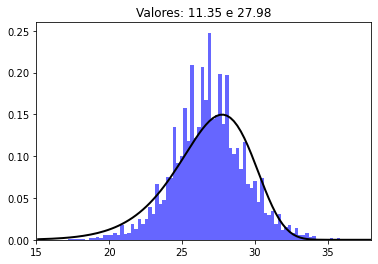

In [ ]:
from scipy.stats import weibull_min
mu = 11.345812667993027
std = 27.981163525530377

plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+89,0.24), density=True, alpha=0.6, color='b')
  

plt.xlim([15, 38])
x = np.linspace(15, 38, 100)
plt.plot(center,weibull(center,shape,scale),'k',label='Wind analysis',lw=2)
title = "Valores: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()


### Beta:
#### Parâmetros calculados manualmente

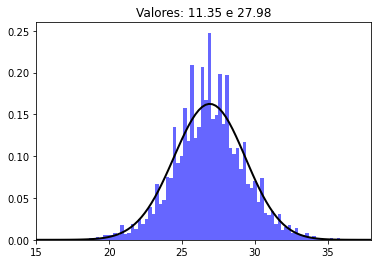

In [ ]:

from scipy.stats import weibull_min

plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+89,0.24), density=True, alpha=0.6, color='b')
  

a,b,l,s = 61127.574559804925, 3027.999838002188, -2765.568788110334, 2930.759460714764
plt.xlim([15, 38])
x = np.linspace(15, 38, 100)
p = stats.beta.pdf(x, a, b,l,s)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Valores: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

### Cauchy
#### O Módulo "stats.cauchy.fit" estima os parâmetros para a distribuição de Cauchy 

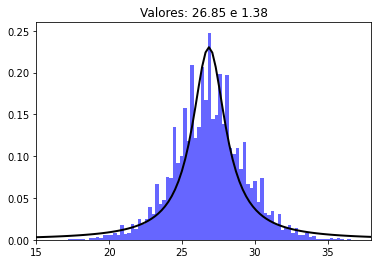

In [ ]:
#f(x)=1sπ(1+((x−t)/s)2)
# T e S

from scipy.stats import weibull_min
mu, std = stats.cauchy.fit(new_df['Temperatura'])

plt.hist(new_df['Temperatura'], bins = np.arange(mini, 
                                           maxi+89,0.24), density=True, alpha=0.6, color='b')
  

plt.xlim([15, 38])
x = np.linspace(15, 38, 100)
p = stats.cauchy.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Valores: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

# Testes Não paramêtricos

## Teste Kolmogorov–Smirnov Para checar se os valores são adequados para a aplicação

Ao aplicar o teste na população inteira, observou-se um empecilho aoencontrar o p value adqueado. Consultando outros materiais, foi possível descobrir que datasets com mais de 1000 valores acarretam na falha do teste. Para solucionar este problema, foi retirada uma amostra aleatória de 500 valores

### Amostra com 500 Valores

In [ ]:
import random
n = 500
tmp = list(new_df['Temperatura'])
amostra = random.sample(tmp, n)

In [ ]:
params1 = stats.norm.fit(amostra, floc=0)
shape = params1[0]
scale = params1[1]
norma = [shape,scale]
params2 = stats.beta.fit(amostra, floc=0, f0=1)
shape2 = params2[1]
scale2 = params2[3]
beta = [shape2,scale2]
params3 = stats.exponweib.fit(amostra, floc=0, f0=1)
shape3 = params3[1]
scale3 = params3[3]
weib = [shape3,scale3]
params4 = stats.cauchy.fit(amostra, floc=0)
shape4 = params4[0]
scale4 = params4[1]
cauchy = [shape4,scale4]

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
params1 = stats.norm.fit(amostra)
params2 = stats.beta.fit(amostra)
params3 = stats.exponweib.fit(amostra)
params4 = stats.cauchy.fit(amostra)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:1608: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


In [ ]:
n =stats.kstest(amostra, "norm", params1)
n2 =stats.kstest(amostra, "exponweib", params3)
n3 =stats.kstest(amostra, "beta", params2)
n4 =stats.kstest(amostra, "cauchy", params4)
print(n)
print(n2)
print(n3)
print(n4)
n[0]

KstestResult(statistic=0.04849042657127611, pvalue=0.18439018549697048)
KstestResult(statistic=0.6895392855285971, pvalue=1.9447515273342524e-237)
KstestResult(statistic=0.050823936647046264, pvalue=0.14599796704440876)
KstestResult(statistic=0.07165770262745758, pvalue=0.011185867773430279)


0.04849042657127611

In [ ]:
da = {'Dist':['Normal','Weibull','beta','cauchy'],
    'stat':[n[0],n2[0],n3[0],n4[0]],
    'pvalor':[n[1],n2[1],n3[1],n4[1]]}
tableAmostra = pd.DataFrame(da)
tableAmostra

,Dist,stat,pvalor
0,Normal,0.048490,1.843902e-01
1,Weibull,0.689539,1.944752e-237
2,beta,0.050824,1.459980e-01
3,cauchy,0.071658,1.118587e-02


In [ ]:
kstatnorm = tableAmostra.loc[tableAmostra['Dist'] == 'Normal', 'stat'].values[0]
kstatwib = tableAmostra.loc[tableAmostra['Dist'] == 'Weibull', 'stat'].values[0]
kstatbeta = tableAmostra.loc[tableAmostra['Dist'] == 'beta', 'stat'].values[0]
kstatcauchy = tableAmostra.loc[tableAmostra['Dist'] == 'cauchy', 'stat'].values[0]
kpvalnorm = tableAmostra.loc[tableAmostra['Dist'] == 'Normal', 'pvalor'].values[0]
kpvalweib = tableAmostra.loc[tableAmostra['Dist'] == 'Weibull', 'pvalor'].values[0]
kpvalbeta = tableAmostra.loc[tableAmostra['Dist'] == 'beta', 'pvalor'].values[0]
kpvalcauchy = tableAmostra.loc[tableAmostra['Dist'] == 'cauchy', 'pvalor'].values[0]
print(kstatwib)

0.6895392855285971


In [ ]:
print(f"norm_a: ks = {kstatnorm:.4f} (p-value = {kpvalnorm:.3e}, É Normal = {kpvalnorm > 0.05})")
print(f"norm_a: ks = {kstatwib:.4f} (p-value = {kpvalweib:.3e}, É Weibull = {kpvalweib > 0.05})")
print(f"norm_a: ks = {kstatbeta:.4f} (p-value = {kpvalbeta:.3e}, É Beta = {kpvalbeta > 0.05})")
print(f"norm_a: ks = {kstatcauchy:.4f} (p-value = {kpvalcauchy:.3e}, É Cauchy = {kpvalcauchy > 0.05})")

norm_a: ks = 0.0485 (p-value = 1.844e-01, É Normal = True)
norm_a: ks = 0.6895 (p-value = 1.945e-237, É Weibull = False)
norm_a: ks = 0.0508 (p-value = 1.460e-01, É Beta = True)
norm_a: ks = 0.0717 (p-value = 1.119e-02, É Cauchy = False)


Calculando os Parâetros para cada uma das distribuições, obtendo os p values e os comparando com um nivel de siginificância de 5%, foi possível observar que as distribuições normal, weibull e Beta froam aceitas como hipótese nula, e apenas a Cauchy foi rejeitada.

### População Total

In [ ]:
n =stats.kstest(new_df['Temperatura'], "norm", norma)
n2 =stats.kstest(new_df['Temperatura'], "exponweib", params3)
n3 =stats.kstest(new_df['Temperatura'], "beta", params2)
n4 =stats.kstest(new_df['Temperatura'], "cauchy", params4)
print(n)
print(n2)
print(n3)
print(n4)


KstestResult(statistic=0.7671309022522869, pvalue=0.0)
KstestResult(statistic=0.6885405614549962, pvalue=0.0)
KstestResult(statistic=0.05608504645011958, pvalue=3.3579786962822093e-42)
KstestResult(statistic=0.06663041065611586, pvalue=2.186592069377361e-59)


In [ ]:
da = {'Dist':['Normal','Weibull','beta','cauchy'],
    'stat':[0.032150111036681306,0.06760749747472805,0.03393257876596534,0.06233659424417903],
    'pvalor':[3.7469572152288435e-14,3.961321393188911e-61,1.021735836358775e-15,4.9443671929150416e-52]}
table = pd.DataFrame(da)
table

,Dist,stat,pvalor
0,Normal,0.032150,3.746957e-14
1,Weibull,0.067607,3.961321e-61
2,beta,0.033933,1.021736e-15
3,cauchy,0.062337,4.944367e-52


![picture](https://drive.google.com/uc?id=1Iy67K7UFWTpDlGDJZ_J-lUtSAk6xpYq7)

In [ ]:
res_norm = 1.36/(15290**(0.5))
norm_dif = 0.032150111036681306 - res_norm
weib_dif = 0.06760749747472805 - res_norm
beta_dif = 0.03393257876596534 - res_norm
cauchy_dif = 0.03393257876596534 - res_norm
print('Norm:',norm_dif)
print('weib:',weib_dif)
print('beta:',beta_dif)
print('cauchy:',cauchy_dif)

Norm: 0.02115156781903657
weib: 0.056608954257083316
beta: 0.022934035548320603
cauchy: 0.022934035548320603


In [ ]:
def kolmogorov_smirnov_critico(data):
    n = len(data)
    if n <= 40:
        # valores entre 1 e 40
        kolmogorov_critico = [0.97500, 0.84189, 0.70760, 0.62394, 0.56328, 0.51926, 0.48342, 0.45427, 0.43001, 0.40925, 
                      0.39122, 0.37543, 0.36143, 0.34890, 0.33760, 0.32733, 0.31796, 0.30936, 0.30143, 0.29408, 
                      0.28724, 0.28087, 0.27490, 0.26931, 0.26404, 0.25907, 0.25438, 0.24993, 0.24571, 0.24170, 
                      0.23788, 0.23424, 0.23076, 0.22743, 0.22425, 0.22119, 0.21826, 0.21544, 0.21273, 0.21012]
        ks_critico = kolmogorov_critico[n - 1]
    elif n > 40:
        # valores acima de 40:
        kolmogorov_critico = 1.36/(np.sqrt(n))
        ks_critico = kolmogorov_critico
    else:
        pass            
            
    return ks_critico

In [ ]:
kolmogorov_smirnov_critico(new_df)

0.010998543217644733

In [ ]:
m = np.mean(amostra)
std = np.std(amostra,ddof=1)
ks_stat,ks_p_valor = stats.kstest(amostra,cdf='norm',args=(m,std),N=len(new_df))
print(ks_stat,ks_p_valor)

0.048710914444411835 0.18045150799742718


In [ ]:
print(f"norm_a: ks = {ks_stat:.4f} (p-value = {ks_p_valor:.3e}, is normal = {4.585401e-08 > 0.05})")

norm_a: ks = 0.0487 (p-value = 1.805e-01, is normal = False)


Qui Quadrado:

In [ ]:
from scipy.stats import chi2_contingency
c, p_valor, graus_de_liberdade, experado = chi2_contingency(new_df['Temperatura'], 'norm') 
print(p_valor)

1.0


In [ ]:
stat, p, dof, exp= chi2_contingency(new_df['Temperatura']) 
 
print(dof)
 
significance_level = 0.05
print("p valor: " + str(p)) 
if p <= significance_level: 
    print('Rejeitar Hipótese Nula') 
else: 
    print('Aceitar Hipótese Nula') 

0
p valor: 1.0
Aceitar Hipótese Nula


## T de Student

In [ ]:
import scipy.stats as stats
import pandas as pd

popmean = np.mean(new_df['Temperatura'])
t_statistic, p_value = stats.ttest_1samp(a=new_df['Temperatura'], popmean=popmean)
print(t_statistic , p_value)

0.0 1.0


#### Notas:

Valor esperado é a probabilidade do evento * o tamanho total da amostra 


## Anderson

In [ ]:
import scipy.stats as stats
stat , cv, sl = stats.anderson(amostra, dist='norm')
print(stat,cv,sl)

1.2333152170808717 [0.571 0.651 0.781 0.911 1.083] [15.  10.   5.   2.5  1. ]


In [ ]:
for i in sl:
  ind = list(sl).index(i)
  print(" Em um nivel de significancia de {}:".format(i))
  if stat > cv[ind]:
    print("Hipotese Nula Rejeitada")
  else:
    print("Hipotese Nula Aceita")

 Em um nivel de significancia de 15.0:
Hipotese Nula Rejeitada
 Em um nivel de significancia de 10.0:
Hipotese Nula Rejeitada
 Em um nivel de significancia de 5.0:
Hipotese Nula Rejeitada
 Em um nivel de significancia de 2.5:
Hipotese Nula Rejeitada
 Em um nivel de significancia de 1.0:
Hipotese Nula Rejeitada


## Chi Squared
Para realizar o teste Chi Square, foi necessário reagrupar as clásses uma vez que 20% delas possuiam uma frequencia de valores menor que 5, distorcendo o resultado do p valor.

### DropPing

In [ ]:
new_amostra = amostra.copy()

In [ ]:
from collections import Counter
a = (Counter(amostra).keys()) 
b = (Counter(amostra).values())
conty = {"Values":a,"Count":b}
conty = pd.DataFrame(conty)
conty

In [ ]:
Probability = []
for i in conty['Count']:
  Probability.append(i/500)
cont = {"Values":a,"Count":b,"Probability":Probability}
cont = pd.DataFrame(cont)
cont

,Values,Count,Probability
0,23.4,5,0.010
1,29.6,8,0.016
2,25.6,10,0.020
3,25.3,7,0.014
4,27.3,6,0.012
...,...,...,...
109,34.7,1,0.002
110,22.1,2,0.004
111,30.9,1,0.002
112,21.2,1,0.002


In [ ]:
prod = []
for n1,n2 in zip(a,Probability):
  prod.append(n1*n2)
s = sum(prod)
s

27.022400000000008

In [ ]:
stats.chisquare(f_obs=amostra, f_exp=s)

Power_divergenceResult(statistic=121.50397892119128, pvalue=1.0)

### Grouping

A função abaixo procura pelos valores mais próximos que possuem uma frequencia maior que cinco após a operação de agrupar, e caso seja positivo, realiza de fato o agrupamento.

In [ ]:
def grouobyneighbors(df):
  sample = []
  for i in df:
    if df.count(i) < 5:
      if df.count(i+0.1) + 1 > 5:
        sample.append(i+0.1)
      elif df.count(i-0.1) +1 > 5:
        sample.append(i-0.1)
      elif df.count(i+0.2) + 1 > 5:
        sample.append(i+0.2)
      elif df.count(i-0.2) +1 > 5:
        sample.append(i-0.2)
    else:
      sample.append(i)
  return sample
grouobyneighbors(new_amostra)

In [ ]:
sample = grouobyneighbors(new_amostra)
sample

In [ ]:
a2 = (Counter(sample).keys()) 
b2 = (Counter(sample).values())
conty2 = {"Values":a2,"Count":b2}
conty2 = pd.DataFrame(conty2)
conty2

In [ ]:
Probability2 = []
for i in conty2['Count']:
  Probability2.append(i/500)
cont2 = {"Values":a2,"Count":b2,"Probability":Probability2}
cont2 = pd.DataFrame(cont2)
cont2

In [ ]:
prod2 = []
for n1,n2 in zip(a2,Probability2):
  prod2.append(n1*n2)
s2 = sum(prod2)
s2

24.696999999999996

In [ ]:
def calc_Expectation(sample):
    a2 = (Counter(sample).keys()) 
    b2 = (Counter(sample).values())
    conty2 = {"Values":a2,"Count":b2}
    conty2 = pd.DataFrame(conty2)
    Probability2 = []
    for i in conty2['Count']:
      Probability2.append(i/500)
    cont2 = {"Values":a2,"Count":b2,"Probability":Probability2}
    cont2 = pd.DataFrame(cont2)
    prod2 = []
    for n1,n2 in zip(a2,Probability2):
      prod2.append(n1*n2)
    s2 = sum(prod2)
         
    return float(s2)

In [ ]:
fd = calc_Expectation(sample)
fd

24.696999999999996

In [ ]:
def calc_Expectation2(a):
    n = len(a)
    prb = 1 / n

    sum = 0
    for i in a:
        sum += (float(i) * prb)
    return float(sum)

In [ ]:
f = calc_Expectation2(sample)
f

26.84456521739133

In [ ]:
stats.chisquare(f_obs=sample, f_exp=f)

Power_divergenceResult(statistic=61.977402113616975, pvalue=1.0)

### Drop Sampling

In [ ]:
def oversampling(df):
  df.drop(df[df['Count'] < 5].index, inplace = True)
  return df

In [ ]:
def oversamplinglist(li):
  for i in li:
    if li.count(i) < 5:
      li.remove(i)
  return li
sample = oversamplinglist(new_amostra)
c = (Counter(sample).keys()) 
d = (Counter(sample).values())
ss = {"Values":c,"Count":d}
ss = pd.DataFrame(ss)
ss

,Values,Count
0,23.4,5
1,29.6,8
2,25.6,10
3,25.3,7
4,27.3,6
...,...,...
63,22.5,1
64,24.9,2
65,21.4,1
66,23.8,1


In [ ]:
Probability2 = []
for i in ss['Count']:
  Probability2.append(i/500)
cont2 = {"Values":c,"Count":d,"Probability":Probability2}
cont2 = pd.DataFrame(cont2)
cont2

,Values,Count,Probability
0,23.4,5,0.010
1,29.6,8,0.016
2,25.6,10,0.020
3,25.3,7,0.014
4,27.3,6,0.012
...,...,...,...
63,22.5,1,0.002
64,24.9,2,0.004
65,21.4,1,0.002
66,23.8,1,0.002


In [ ]:
prod2 = []
for n1,n2 in zip(c,Probability2):
  prod2.append(n1*n2)
s2 = sum(prod)
s2

27.022400000000008

In [ ]:
stats.chisquare(f_obs=sample, f_exp=s2)

Power_divergenceResult(statistic=59.24898073302151, pvalue=1.0)

## Lilliefors

In [ ]:
from statsmodels.stats.diagnostic import lilliefors
stt, pv = lilliefors(amostra, dist='norm')
print(f"norm_a: ks = {stt:.4f} (p-value = {pv:.3e}, É Normal = {pv > 0.05})")

norm_a: ks = 0.0487 (p-value = 6.523e-03, É Normal = False)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Parametric Monte Carlo Simulation 

In [ ]:
n = 500
tmp = list(new_df['Temperatura'])
amostra_mc = random.sample(tmp, n)
amostra_mc = pd.DataFrame({'temp':amostra_mc})
amostra_mc['class'] = pd.qcut(amostra_mc['temp'].rank(method='first'), q=89)
amostra_mc

,temp,class
0,27.2,"(292.551, 298.157]"
1,25.4,"(118.742, 124.348]"
2,24.8,"(79.494, 85.101]"
3,29.4,"(427.112, 432.719]"
4,26.6,"(225.27, 230.876]"
...,...,...
495,30.8,"(471.966, 477.573]"
496,26.3,"(197.236, 202.843]"
497,21.2,"(6.607, 12.213]"
498,26.8,"(258.91, 264.517]"


In [ ]:
mc_sample = list(new_df['Temperatura'])

In [ ]:
mc_df = grouobyneighbors(mc_sample)
mu = sum(mc_df)/len(mc_df)
sigma = np.std(mc_df)
print(mu)
print(sigma)

26.86583043278362
2.3954244212981965


In [ ]:
def montecarlo(df, r,params,dist):
  mc = []
  pval = []
  stat = []
  for i in range(r):
    a = [np.random.normal(loc=mu, scale=sigma, size=500)]
    mc.append(a)
    ks_test = stats.kstest(df, dist, params)
    p = ks_test[1]
    s = ks_test[0]
    pval.append(p)
    stat.append(s)
  return pval, stat, mc  

In [ ]:
#plt.plot(*Montecarlo)

In [ ]:
resultnorm = montecarlo(mc_sample,2000, params1,"norm")
resultbeta = montecarlo(mc_sample,2000, params2,"beta")
resultweib = montecarlo(mc_sample,2000, params3,"exponweib")
resultcauchy = montecarlo(mc_sample,2000, params4,"cauchy")
pval = resultnorm[0]
stat = resultnorm[1]
pval2 = resultbeta[0]
stat2 = resultbeta[1]
pval3 = resultweib[0]
stat3 = resultweib[1]
pval4 = resultcauchy[0]
stat4 = resultcauchy[1]
table = pd.DataFrame({"Normal":{"Statistics":stat, "Pvalue":pval}, "Beta":{"Statistics":stat2, "Pvalue":pval2},"Weib":{"Statistics":stat3, "Pvalue":pval3},"Cauchy":{"Statistics":stat4, "Pvalue":pval4}})
table

KeyboardInterrupt: ignored

In [ ]:
table1 = pd.DataFrame({"Statistics":stat, "Pvalue":pval})
table2 = pd.DataFrame({"Statistics":stat2, "Pvalue":pval2})
table3 = pd.DataFrame({"Statistics":stat3, "Pvalue":pval3})
table4 = pd.DataFrame({"Statistics":stat4, "Pvalue":pval4})
statmean = sum(stat)/len(stat)
statmean2 = sum(stat2)/len(stat2)
statmean3 = sum(stat3)/len(stat3)
statmean4 = sum(stat4)/len(stat4)
closest = stat[min(range(len(stat)), key = lambda x: abs(stat[x]-statmean))]
closest2 = stat2[min(range(len(stat2)), key = lambda x: abs(stat2[x]-statmean2))]
closest3 = stat3[min(range(len(stat3)), key = lambda x: abs(stat3[x]-statmean3))]
closest4 = stat4[min(range(len(stat4)), key = lambda x: abs(stat4[x]-statmean4))]
new_table = table1.loc[table1["Statistics"] == closest]
new_table2 = table2.loc[table2["Statistics"] == closest2]
new_table3 = table3.loc[table3["Statistics"] == closest3]
new_table4 = table4.loc[table4["Statistics"] == closest4]
pvalue = new_table["Pvalue"].iat[0]
pvalue2 = new_table2["Pvalue"].iat[0]
pvalue3 = new_table3["Pvalue"].iat[0]
pvalue4 = new_table4["Pvalue"].iat[0]
print(f"É Normal = {pvalue > 0.05})")
print(f"É Weibull = {pvalue2 > 0.05})")
print(f"É Beta = {pvalue3 > 0.05})")
print(f"É Cauchy = {pvalue4 > 0.05})")

# Bootstrap

In [ ]:
bootsample = list(new_df['Temperatura'])

In [ ]:
def kspval(sample,params,dist):
  pval =stats.kstest(sample, dist, params)[1]
  return pval
def lilitestpval(sample):
  stt, pv = lilliefors(sample, dist='norm')
  return pv
def chipval(sample,expec):
  pval = stats.chisquare(f_obs=sample, f_exp=expec)[1]
  return pval
def andpval(sample):
  stat = stats.anderson(sample, dist='norm')[0]
  return stat

In [ ]:
def bootstrap(df,r,params,dist):
  boot = []
  expected_value = calc_Expectation2(df)
  ks_best = None
  lili_best = None
  chi_best = None
  ande_best = None

  for i in range(r):
    a = random.sample(df, 500)
    ks =kspval(a,params1,dist)
    lili  = lilitestpval(a)
    chi = float(chipval(a,expected_value))
    ande = andpval(a)

    if ks_best == None:
      ks_best = ks
    elif ks_best < ks:
      ks_best = ks
    
    if lili_best == None:
      lili_best = lili
    elif lili_best < lili:
      lili_best = lili

    if chi_best == None:
      chi_best = chi
    elif chi_best < chi:
      chi_best = chi
    
    if ande_best == None:
      ande_best = ande
    elif ande_best < ande:
      ande_best = ande
    
    boot.append(a)
  return [ks_best, lili_best, chi_best, ande_best], boot
  

In [ ]:
result = bootstrap(bootsample,1000, params1,"norm")

In [ ]:
testes = result[0]
boot = result[1]

In [ ]:
testes

In [ ]:
def BootsTrap(df,n,params,dist):
  pval = []
  stat = []
  boot = []
  for i in range(n):
    sample = random.sample(df,500)
    ks_test = stats.kstest(sample, dist, params)
    boot.append([ks_test])
    p = ks_test[1]
    s = ks_test[0]
    pval.append(p)
    stat.append(s)
  return pval,stat,boot

In [ ]:
resultnorm = BootsTrap(bootsample,2000, params1,"norm")
resultbeta = BootsTrap(bootsample,2000, params2,"beta")
resultweib = BootsTrap(bootsample,2000, params3,"exponweib")
resultcauchy = BootsTrap(bootsample,2000, params4,"cauchy")
pval = resultnorm[0]
stat = resultnorm[1]
pval2 = resultbeta[0]
stat2 = resultbeta[1]
pval3 = resultweib[0]
stat3 = resultweib[1]
pval4 = resultcauchy[0]
stat4 = resultcauchy[1]
table = pd.DataFrame({"Normal":{"Statistics":stat, "Pvalue":pval}, "Beta":{"Statistics":stat2, "Pvalue":pval2},"Weib":{"Statistics":stat3, "Pvalue":pval3},"Cauchy":{"Statistics":stat4, "Pvalue":pval4}})
table

In [ ]:
table1 = pd.DataFrame({"Statistics":stat, "Pvalue":pval})
table2 = pd.DataFrame({"Statistics":stat2, "Pvalue":pval2})
table3 = pd.DataFrame({"Statistics":stat3, "Pvalue":pval3})
table4 = pd.DataFrame({"Statistics":stat4, "Pvalue":pval4})

In [ ]:
sn.histplot(table1["Pvalue"])

In [ ]:
import seaborn as sns
sns.histplot(table1["Statistics"])

In [ ]:
statmean = sum(stat)/len(stat)
statmean

In [ ]:
closest = stat[min(range(len(stat)), key = lambda x: abs(stat[x]-statmean))]
closest

In [ ]:
new_table = table1.loc[table1["Statistics"] == closest]
new_table

In [ ]:
pvalue = new_table["Pvalue"].iat[0]
pvalue

In [ ]:
new_df['Temperatura'].std()

In [ ]:
statmean2 = sum(stat2)/len(stat2)
statmean3 = sum(stat3)/len(stat3)
statmean4 = sum(stat4)/len(stat4)
closest2 = stat2[min(range(len(stat2)), key = lambda x: abs(stat2[x]-statmean2))]
closest3 = stat3[min(range(len(stat3)), key = lambda x: abs(stat3[x]-statmean3))]
closest4 = stat4[min(range(len(stat4)), key = lambda x: abs(stat4[x]-statmean4))]
new_table2 = table2.loc[table2["Statistics"] == closest2]
new_table3 = table3.loc[table3["Statistics"] == closest3]
new_table4 = table4.loc[table4["Statistics"] == closest4]
pvalue2 = new_table2["Pvalue"].iat[0]
pvalue3 = new_table3["Pvalue"].iat[0]
pvalue4 = new_table4["Pvalue"].iat[0]

In [ ]:
print(f"É Normal = {pvalue > 0.05})")
print(f"É Weibull = {pvalue2 > 0.05})")
print(f"É Beta = {pvalue3 > 0.05})")
print(f"É Cauchy = {pvalue4 > 0.05})")

In [ ]:
new_table4

## Bootstrap Chi Square

### Normal

In [ ]:
lista = new_df['Temperatura']
lista = lista.to_numpy()
lista

array([22.4, 24. , 24.8, ..., 25.5, 23.2, 22.5])

In [ ]:
len(lista)

15290

In [ ]:
15290/5

3058.0

In [ ]:
import scipy.stats as stats 
mean = np.mean(new_df['Temperatura'])
std = np.std(new_df['Temperatura'])
bins = 3058.0
classes = []
for i in range(1,3059):
  val = stats.norm.ppf(i/bins, mean, std)
  interval.append(val)
classes 

In [ ]:
classes.insert(0, -np.inf)
classes

In [ ]:
dff = pd.DataFrame({'lower_limit':classes[:-1], 'upper_limit':classes[1:]})
dff 

,lower_limit,upper_limit
0,-inf,18.503977
1,18.503977,18.979817
2,18.979817,19.270038
3,19.270038,19.481850
4,19.481850,19.649771
...,...,...
3053,34.081256,34.249177
3054,34.249177,34.460989
3055,34.460989,34.751210
3056,34.751210,35.227050


In [ ]:
show = dff.iloc[np.r_[0:4, -4:0]]
print(show.to_latex(index=False))

\begin{tabular}{rr}
\toprule
 lower\_limit &  upper\_limit \\
\midrule
        -inf &    18.503977 \\
   18.503977 &    18.979817 \\
   18.979817 &    19.270038 \\
   19.270038 &    19.481850 \\
   34.249177 &    34.460989 \\
   34.460989 &    34.751210 \\
   34.751210 &    35.227050 \\
   35.227050 &          inf \\
\bottomrule
\end{tabular}



In [ ]:
tp = list(sorted(new_df['Temperatura']))
dff['obs_freq'] = dff.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in tp]), axis=1)
dff['exp_freq'] = 5
dff 

,lower_limit,upper_limit,obs_freq,exp_freq
0,-inf,18.503977,24,5
1,18.503977,18.979817,9,5
2,18.979817,19.270038,8,5
3,19.270038,19.481850,14,5
4,19.481850,19.649771,11,5
...,...,...,...,...
3053,34.081256,34.249177,11,5
3054,34.249177,34.460989,5,5
3055,34.460989,34.751210,3,5
3056,34.751210,35.227050,8,5


In [ ]:
show = dff.iloc[np.r_[0:5, -5:0]]
print(show.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 lower\_limit &  upper\_limit &  obs\_freq &  exp\_freq \\
\midrule
        -inf &    18.503977 &        24 &         5 \\
   18.503977 &    18.979817 &         9 &         5 \\
   18.979817 &    19.270038 &         8 &         5 \\
   19.270038 &    19.481850 &        14 &         5 \\
   19.481850 &    19.649771 &        11 &         5 \\
   34.081256 &    34.249177 &        11 &         5 \\
   34.249177 &    34.460989 &         5 &         5 \\
   34.460989 &    34.751210 &         3 &         5 \\
   34.751210 &    35.227050 &         8 &         5 \\
   35.227050 &          inf &        16 &         5 \\
\bottomrule
\end{tabular}



In [ ]:
stats.chisquare(dff['obs_freq'], dff['exp_freq'])

Power_divergenceResult(statistic=619210.4, pvalue=0.0)

In [ ]:
p = 2 # número de parâmetros
DOF = len(dff['obs_freq']) - p -1
stats.chi2.ppf(0,95, DOF)

In [ ]:
15290/3058

5.0

### Weibull

In [ ]:
lista = new_df['Temperatura']
lista = lista.to_numpy()
lista

In [ ]:
len(lista)

In [ ]:
15290/5

In [ ]:
mu = 11.345812667993027
std = 27.981163525530377
bins = 3058.0
interval = []
for i in range(1,3059):
  val = stats.weibull_max.ppf(i/bins, mu, std)
  interval.append(val)
interval 

In [ ]:
interval.insert(0, -np.inf)
interval

In [ ]:
dff = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
dff 

In [ ]:
life_values = list(sorted(new_df['Temperatura']))
dff['obs_freq'] = dff.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in life_values]), axis=1)
dff['exp_freq'] = 5
dff 

In [ ]:
stats.chisquare(dff['obs_freq'], dff['exp_freq'])

In [ ]:
p = 2 # número de parâmetros
DOF = len(dff['obs_freq']) - p -1
stats.chi2.ppf(0,95, DOF)

## Beta

In [ ]:
a,b,l,s = 61127.574559804925, 3027.999838002188, -2765.568788110334, 2930.759460714764
bins = 3058.0
interval = []
for i in range(1,3059):
  val = stats.beta.ppf(i/bins, a,b,l,s)
  interval.append(val)
interval 

In [ ]:
interval.insert(0, -np.inf)
interval

In [ ]:
dff = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
dff 

In [ ]:
life_values = list(sorted(new_df['Temperatura']))
dff['obs_freq'] = dff.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in life_values]), axis=1)
dff['exp_freq'] = 5
dff 

In [ ]:
stats.chisquare(dff['obs_freq'], dff['exp_freq'])

In [ ]:
p = 2 # número de parâmetros
DOF = len(dff['obs_freq']) - p -1
stats.chi2.ppf(0,95, DOF)

## Cauchy

In [ ]:
mu, std = stats.cauchy.fit(new_df['Temperatura'])
bins = 3058.0
interval = []
for i in range(1,3059):
  val = stats.beta.ppf(i/bins, mu,std)
  interval.append(val)
interval 

In [ ]:
interval.insert(0, -np.inf)
interval

In [ ]:
dff = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
dff 

In [ ]:
life_values = list(sorted(new_df['Temperatura']))
dff['obs_freq'] = dff.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in life_values]), axis=1)
dff['exp_freq'] = 5
dff 

In [ ]:
stats.chisquare(dff['obs_freq'], dff['exp_freq'])

In [ ]:
p = 2 # número de parâmetros
DOF = len(dff['obs_freq']) - p -1
stats.chi2.ppf(0,95, DOF)

# Lilifors Bootstrap

In [ ]:
def BootsTrapLilifors(df,n):
  pval = []
  stat = []
  boot = []
  for i in range(n):
    sample = random.sample(df,500)
    stt, pv = lilliefors(sample, dist='norm')
    boot.append([stt, pv])
    pval.append(pv)
    stat.append(stt)
  return pval,stat,boot

In [ ]:
resultnorm = BootsTrapLilifors(bootsample,2000)
pval = resultnorm[0]
stat = resultnorm[1]

In [ ]:
table1 = pd.DataFrame({"Statistics":stat, "Pvalue":pval})
sns.histplot(table1["Pvalue"])

In [ ]:
sns.histplot(table1["Statistics"])

In [ ]:
statmean = sum(stat)/len(stat)
closest = stat[min(range(len(stat)), key = lambda x: abs(stat[x]-statmean))]
new_table = table1.loc[table1["Statistics"] == closest]
new_table

In [ ]:
pvalue = new_table["Pvalue"].iat[0]
pvalue

In [ ]:
print(f"É Normal = {pvalue > 0.05})")

# Anderson Darling Bootstrap

In [ ]:
def BootsTrapAnderson(df,n,dist):
  critic = []
  statistic = []
  for i in range(n):
    sample = random.sample(df,500)
    stat , cv, sl = stats.anderson(sample, dist='norm')
    critic.append(cv)
    statistic.append(stat)
  return critic,statistic,sl

In [ ]:
n = 500
tmp = list(new_df['Temperatura'])
amostra4 = random.sample(tmp, n)
stat , cv, sl = stats.anderson(amostra4, dist='norm')
print(stat)
print(cv)
print(sl)

In [ ]:
resultnorm = BootsTrapAnderson(bootsample,2000,"norm")
resultexpon = BootsTrapAnderson(bootsample,2000,"expon")
resultlogistic = BootsTrapAnderson(bootsample,2000,"logistic")
resultgumbel = BootsTrapAnderson(bootsample,2000,"gumbel")
resultgumbelL = BootsTrapAnderson(bootsample,2000,"gumbel_l")
resultgumbelR = BootsTrapAnderson(bootsample,2000,"gumbel_r")
resultextreme = BootsTrapAnderson(bootsample,2000,"extreme1")

critic = resultnorm[0]
stat = resultnorm[1]



sl = stats.anderson(amostra, dist='norm')[2]

In [ ]:
critic2,stat2,a = resultexpon
critic3,stat3,a2 = resultlogistic
critic4,stat4,a3 = resultgumbel
critic5,stat5,a4 = resultgumbelL
critic6,stat6,a5 = resultgumbelR
critic7,stat7,a6 = resultextreme

In [ ]:
critic

In [ ]:
table1 = pd.DataFrame({"Statistics":stat, "Critic":critic})
table2 = pd.DataFrame({"Statistics":stat2, "Critic":critic2})
table3 = pd.DataFrame({"Statistics":stat3, "Critic":critic3})
table4 = pd.DataFrame({"Statistics":stat4, "Critic":critic4})
table5 = pd.DataFrame({"Statistics":stat5, "Critic":critic5})
table6 = pd.DataFrame({"Statistics":stat6, "Critic":critic6})
table7 = pd.DataFrame({"Statistics":stat7, "Critic":critic7})
sns.histplot(table1["Statistics"])

In [ ]:
statmean = sum(stat)/len(stat)
statmean2 = sum(stat2)/len(stat2)
statmean3 = sum(stat3)/len(stat3)
statmean4 = sum(stat4)/len(stat4)
statmean5 = sum(stat5)/len(stat5)
statmean6 = sum(stat6)/len(stat6)
statmean7 = sum(stat7)/len(stat7)
closest = stat[min(range(len(stat)), key = lambda x: abs(stat[x]-statmean))]
closest2 = stat2[min(range(len(stat2)), key = lambda x: abs(stat2[x]-statmean2))]
closest3 = stat3[min(range(len(stat3)), key = lambda x: abs(stat3[x]-statmean3))]
closest4 = stat4[min(range(len(stat4)), key = lambda x: abs(stat4[x]-statmean4))]
closest5 = stat5[min(range(len(stat5)), key = lambda x: abs(stat5[x]-statmean5))]
closest6 = stat6[min(range(len(stat6)), key = lambda x: abs(stat6[x]-statmean6))]
closest7 = stat7[min(range(len(stat7)), key = lambda x: abs(stat7[x]-statmean7))]

new_table = table1.loc[table1["Statistics"] == closest]
new_table2 = table2.loc[table2["Statistics"] == closest2]
new_table3 = table3.loc[table3["Statistics"] == closest3]
new_table4 = table4.loc[table4["Statistics"] == closest4]
new_table5 = table5.loc[table5["Statistics"] == closest5]
new_table6 = table6.loc[table6["Statistics"] == closest6]
new_table7 = table7.loc[table7["Statistics"] == closest7]
new_table

In [ ]:
closest2

In [ ]:
Critical = new_table["Critic"].iat[0]
Critical2 = new_table2["Critic"].iat[0]

Critical3 = new_table3["Critic"].iat[0]
Critical4 = new_table4["Critic"].iat[0]
Critical5 = new_table5["Critic"].iat[0]
Critical6 = new_table6["Critic"].iat[0]
Critical7 = new_table7["Critic"].iat[0]
Critical

In [ ]:
for i in sl:
  ind = list(sl).index(i)
  print(" Em um nivel de significancia de {}:".format(i))
  if statmean > Critical[ind]:
    print("Hipotese Nula Rejeitada")
  else:
    print("Hipotese Nula Aceita")

In [ ]:
Critical[2]

In [ ]:

if statmean > Critical[2]:
  print("Hipotese NOrmal Rejeitada")
else:
    print("Hipotese Nula Aceita")
if statmean2 > Critical2[2]:
    print("Hipotese exponencial Rejeitada")
else:
    print("Hipotese exponencial Aceita")
    
if statmean3 > Critical3[2]:
    print("Hipotese Logistica Rejeitada")
else:
    print("Hipotese Logistica Aceita")
if statmean4 > Critical4[2]:
    print("Hipotese Gumbell Rejeitada")
else:
    print("Hipotese Gumbell Aceita")
if statmean5 > Critical5[2]:
    print("Hipotese GumbellL Rejeitada")
else:
    print("Hipotese GumbellL Aceita")
if statmean6 > Critical6[2]:
    print("Hipotese GumbellR Rejeitada")
else:
    print("Hipotese GumbellR Aceita")
if statmean7 > Critical7[2]:
    print("Hipotese Extreme Rejeitada")
else:
    print("Hipotese Extreme Aceita")

# Função geradora de momento

In [ ]:
import statistics
statistics.variance(new_df["Temperatura"])

6.019498019474882

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
means = new_df['Temperatura'].mean()
stds = new_df['Temperatura'].std()

In [ ]:
# Momentos da Distribuição Teórica
import numpy as np
import scipy.stats as stats 
momentsample2 = np.random.normal(loc=means, scale=stds, size=15290)
print("Momento 1:", momentsample2.mean())
print("Momento 2:", stats.moment(momentsample2, moment=2), "(Dispersão/variancia)")
print("Momento 3:", stats.moment(momentsample2, moment=3), "(Assimetria/skewness)")
print("Momento 4:", stats.moment(momentsample2, moment=4), "(Curtose)")

Momento 1: 26.88976644434762
Momento 2: 6.050110500031235 (Dispersão/variancia)
Momento 3: -0.36258463154561416 (Assimetria/skewness)
Momento 4: 110.66856457733246 (Curtose)


In [ ]:
# Momentos da Distribuição Empírica
print("Momento 1:", new_df['Temperatura'].mean())
print("Momento 2:", stats.moment(new_df['Temperatura'], moment=2), "(Dispersão/variancia)")
print("Momento 3:", stats.moment(new_df['Temperatura'], moment=3), "(Assimetria/skewness)")
print("Momento 4:", stats.moment(new_df['Temperatura'], moment=4), "(Curtose)")

Momento 1: 26.865513407455854
Momento 2: 6.019104330918997 (Dispersão/variancia)
Momento 3: -0.5484174445920476 (Assimetria/skewness)
Momento 4: 133.03677513806062 (Curtose)
